<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Least-Squares Regression

**Abstract**

The main aim of this assignment is the appliance least-squares regression methods for the analysis of the data and choose the best-suited one. The problem we studied was about laboratory practice with measurements of the voltage with a fixed time step. Design behind of this study is mainly focused on writing algorithms for each least-squares regression method, plotting the graph of these algorithms and conduct a comparative analysis. During the analysis it was found that exponential equation and second order polynomial have a better performance than straight line method in fitting the experimental data.


**Introduction**

It can be said that least-squares regression is mostly about deriving an approximating function that corresponds with the general trend of the given data.In this assignment we will analyze three methods of least-squares approximations which will be fitting mathematical expressions such as:


*   Straight line $f(x) = a_{0} + a_{1}x$.
*   Exponential equation $f(x) = a_{0} e^{a_{1}x}$.
*   Second order polynomial $f(x) = a_{0} + a_{1}x+ a_{2} x^2$.

It can be assumed that for finding the best-suited method for the problem of the assignment we will use Quantification of Error of Linear Regression.This process will help us to determine the best-suited method by calutating the correlation coefficient.For a perfect fit the correlation coefficient should be equal to 1 or to be close to 1. However, beforehand we will plot the visual represenation of each method for a check of linear relation between x and y.

**Methods**


First of all I wrote the special algorithm for each method that will calculate all the necessary quantities such as:

*   $$\sum{x_i} $$
*   $$\sum{y_i} $$
*   $$\sum{(x_i)^2} $$
*   $$\sum{(y_i*x_i)} $$


and etc. It should be noted that for each method there is unique set of quantites which should be calculated. Mostly, I used simple mathematical expressions for calculating the needed values. However for the exponential case, I used "np.log" function of numpy library for transforming the exponential function to linear one by taking the whole expression into natural logarithm.In the second order polynomial, I used "scipy.linalg" library for importing the "solve" function for finding the matrix of coefficient of an approximated form of the second order polynomial.I used this technique, as it will be complicated and time-consuming to calculate the augmented matrix by writing the special - case algorithm like Gaussian elimination. 

All these calculations is needed for finding the coefficients for linear least-squares regression fitting the mathematical expressions which were mentioned before. After finding the approximated form of the particular function,I started to plot the graph for each method, where the least-squares regression was visualized.Analyzing these plots, I already had an assumption whether this linear least-squares regression is the best-suited one or not. I analyze it by looking at the distances between the true values of **y** and predicted ones.As the concluding step, I calculated the correlation coefficients of each method by applying simple mathematical operators and for loops.Each method has the almost same way of calculating the necessaty values for computing the correlation coefficients.





**Main Body**

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math

In [ ]:
import pandas as pd
path = 'https://drive.google.com/uc?export=download&id=1RBXwhNt6BMpkiaS3GhsTFcHuSVBvqfnG'
data = pd.read_csv(path)



**Task 1**

 Write your Python code to perform a linear least-squares regression fitting a straight line $f(x) = a_{0} + a_{1}x$.

In [ ]:
#calculation of all necessary quantities for finding the coef.
n = 50
sum_x = data['Time'].sum()
sum_y = data['Voltage'].sum()
time = np.array(data['Time'])
volt = np.array(data['Voltage'])
sum_xy = 0
sum_xx = 0
x_mean = sum_x/n
y_mean = sum_y/n
for i in range(n):
  temp_1 = time[i]*volt[i]
  sum_xy += temp_1
  temp_2 = (time[i])**2
  sum_xx += temp_2 

Calculation of coefficients for linear least-squares regression fitting a straight line

In [ ]:
a_1 = (n*sum_xy-sum_x*sum_y)/(n*sum_xx-(sum_x)**2)
a_0 = y_mean-a_1*x_mean
print(a_0,a_1)

7.670451687058824 -7.527549384283316


Straight line function 

 $f(x) = 7.670451687058824 -7.527549384283316x$.

**Task 2**

Write your Python code to perform a linear least-squares regression fitting an exponential equation $f(x) = a_{0} e^{a_{1}x}$.

In [ ]:
lny = np.log(volt)
sum_x = data['Time'].sum()
sum_lny = lny.sum()
sum_x_lny = 0
sum_xx = 0
x_mean = sum_x/n
lny_mean = sum_lny/n
for i in range(n):
  temp_1 = time[i]*lny[i]
  sum_x_lny += temp_1
  temp_2 = (time[i])**2
  sum_xx += temp_2 
print(sum_xx,sum_x_lny)

16.169999999999998 21.258365065310603


Calculation of coefficients

In [ ]:
a_1_2 = (n*sum_x_lny-sum_x*sum_lny)/(n*sum_xx-(sum_x)**2)
a_0_2 = lny_mean-a_1_2*x_mean
print(a_0_2,a_1_2)

2.2075110258064234 -2.0300343269602212


Calculation of alpha and beta for finding the original form of exponential equation

In [ ]:
alpha  = math.exp(a_0_2)
beta = a_1_2
print(alpha)
print(beta)

9.093055822668004
-2.0300343269602212


Exponential equation 

$f(x) = 9.093055822668004 e^{-2.0300343269602212
x}$.

**Task 3**

Write your Python code to perform a linear least-squares regression fitting a second order polynomial $f(x) = a_{0} + a_{1}x+ a_{2} x^2$.

In [ ]:
sum_x = data['Time'].sum()
sum_y = data['Voltage'].sum()
time = np.array(data['Time'])
volt = np.array(data['Voltage'])

sum_xy = 0
sum_xx = 0
sum_xxx = 0
sum_xxxx = 0
sum_xxy = 0

x_mean = sum_x/n
y_mean = sum_y/n
for i in range(n):
  temp_1 = time[i]*volt[i]
  sum_xy += temp_1
  temp_2 = (time[i])**2
  sum_xx += temp_2 
  temp_3 = (time[i])**3
  sum_xxx += temp_3
  temp_4 = (time[i])**4
  sum_xxxx += temp_4
  temp_5 = ((time[i])**2)*volt[i]
  sum_xxy += temp_5

Calculation of coefficients by finding the solution for an augmented matrix

In [ ]:
from scipy.linalg import solve
A = [[n,sum_x,sum_xx],[sum_x,sum_xx,sum_xxx],[sum_xx,sum_xxx,sum_xxxx]]
b = [sum_y,sum_xy,sum_xxy]
a = solve(A, b)
print(a)

[  8.85774677 -14.94814368   7.572035  ]


Second order polynomial 

$f(x) = 8.85774677 -14.94814368x + 7.572035x^2$.

**Task 4**

Finding the Error estimation and Correlation coefficients of each method:


4.1 Straight line $f(x) = a_{0} + a_{1}x$.

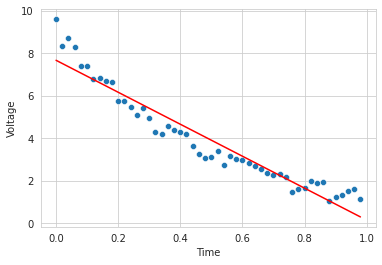

In [ ]:
plt.plot(time,a_0+a_1*time , color='r')
sns.set_style("whitegrid")
sns.scatterplot(x = 'Time', y = 'Voltage',data = data)

In [ ]:
#Calculation of the standard deviation 's_y'.
s_t = 0
for i in range(n):
  difference = (volt[i] - y_mean)**2
  s_t += difference

s_y = 0
s_y = (s_t/(n-1))**0.5
print("Standard deviation of y: ",s_y)

#Sum of the squares of the residuals 's_r'.
s_r = 0
for i in range(n):
  difference = (volt[i] - a_0 - a_1*time[i])**2
  s_r += difference

#Calculation of standard error of the estimate 's_yx'.
s_yx = 0
s_yx = (s_r/(n-2))**0.5
print("Standard error of the estimate: ",s_yx)

#Calculation of coefficient of determination 'r_2' and correlation coefficient 'r'
r_2 = 0
r = 0
r_2 = (s_t - s_r)/(s_t)
r = (r_2)**0.5
print("Coefficient of determination: ", r_2)
print("Correlation coefficient: ", r)

Standard deviation of y:  2.287466541692321
Standard error of the estimate:  0.6517140365591918
Coefficient of determination:  0.9204848639724048
Correlation coefficient:  0.9594190241872447


Here we can see that we have plotted linear least-squares regression fitting a straight line and this gives us a linear relation between x and y.This linear relation was need for approving the further calculation of the correlation coefficient which is 0.6323279318298168.

4.2 Exponential equation $f(x) = a_{0} e^{a_{1}x}$.

The standard deviation for y remains the same. Other parameters such as "Standard error of the estimate" and "Correlation coefficient" will be calculated.

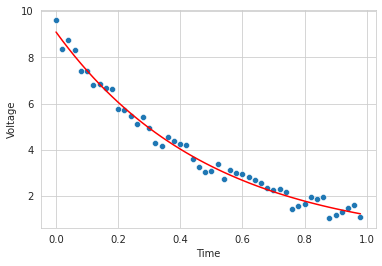

In [ ]:
alpha = math.exp(a_0_2)
beta = a_1_2
plt.plot(time, alpha*np.exp(beta*time), color = 'r')
sns.scatterplot(x = 'Time', y = 'Voltage',data = data)

In [ ]:
#Sum of the squares of the residuals 's_r'.
s_r = 0
for i in range(n):
  difference = (volt[i] - alpha*np.exp(beta*time[i]))**2
  s_r += difference

#Calculation of standard error of the estimate 's_yx'.
s_yx = 0
s_yx = (s_r/(n-2))**0.5
print("Standard error of the estimate: ",s_yx)

#Calculation of coefficient of determination 'r_2' and correlation coefficient 'r'
r_2 = 0
r = 0
r_2 = (s_t - s_r)/(s_t)
r = (r_2)**0.5
print("Coefficient of determination: ", r_2)
print("Correlation coefficient: ", r)

Standard error of the estimate:  0.27290644069258735
Coefficient of determination:  0.9860567752737128
Correlation coefficient:  0.9930039150344337


4.3 Second order polynomial $f(x) = a_{0} + a_{1}x+ a_{2} x^2$.

The standard deviation for y remains the same. Other parameters such as "Standard error of the estimate" and "Correlation coefficient" will be calculated.

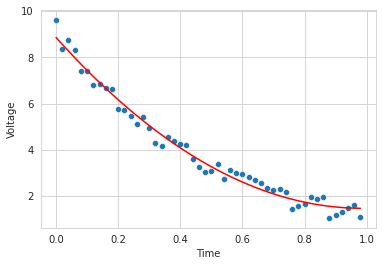

In [ ]:
plt.plot(time, a[0]+a[1]*time+a[2]*time**2, color = 'r')
sns.scatterplot(x = 'Time', y = 'Voltage', data = data)

In [ ]:
#Sum of the squares of the residuals 's_r'.
s_r = 0
for i in range(n):
  difference = (volt[i] - a[0] - a[1]*time[i] - a[2]*time[i]**2)**2
  s_r += difference

#Calculation of standard error of the estimate 's_yx'.
s_yx = 0
s_yx = (s_r/(n-3))**0.5
print("Standard error of the estimate: ",s_yx)

#Calculation of coefficient of determination 'r_2' and correlation coefficient 'r'
r_2 = 0
r = 0
r_2 = (s_t - s_r)/(s_t)
r = (r_2)**0.5
print("Coefficient of determination: ", r_2)
print("Correlation coefficient: ", r)

Standard error of the estimate:  0.3091633411351379
Coefficient of determination:  0.9824786219138495
Correlation coefficient:  0.9912005962033363


**Task 5**

By analyzing the graphical visualizatios of each method, it can be claimed that both exponential equation and second order polynomial fits better the experimental data than straight line function.Also these expressions better describes the physical process, due to the visual representation of the graphs where the residuals seem smaller than straight line function has.

**Task 6**

Results of the correlation coefficients of each method is represented below:



*   Straight line: 0.9594190241872447
*   Exponential equation: 0.9930039150344337
*   Second order polynomial: 0.9912005962033363

So, it can be seen that Exponential equation has the greatest correlcation coefficient which is close to 1.0. This tells us that line explains 98.6 percent
of the variability of the data, because the coefficient of determination is 0.9860567752737128.Answering to the question of the task 6, the exponential equation method is more suitable for a given problem.



**Task 7**

Here, I applied the "lmplot" function from seaborn library to fit the experimental data.

<Figure size 720x432 with 0 Axes>

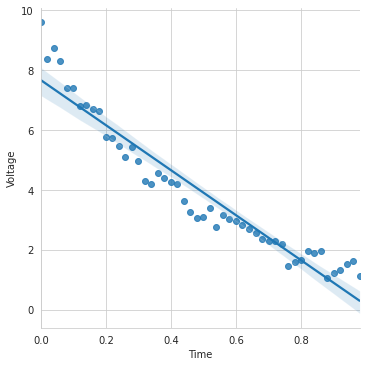

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.lmplot(x = 'Time', y = 'Voltage', data = data)

**Conclusion**

In this assignment we assessed all three methods of developing the least-squares regressions  and analyzed all the curves for finding the best-suited one, which is exponential equation.Overall the assessment of methods and making a decision which method should be used are the most important skills various fields.Linear regression is a model designed for predicting the values and if the least efficient method was chosen, the predictions will not so accurate as much as possible.Therefore, it is important to have an objective view on different methods that will help you to achieve the result, and choose the most appropriate one.